In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data import Data
from sklearn.preprocessing import StandardScaler

In [2]:
class SymptomPopularity:
    def __init__(self, data: pd.DataFrame):
        self.d = data

    def symptoms_popularity(self):
        # scale the values of new_hospitalized to be able to compare its TREND
        # with popularity of symptoms. We don't care about the actual values
        # but really about the TREND -> hence dividing by a constant doesn't change
        # the trend appearance
        self.d['hospitalized_new'] = self.d['hospitalized_new']/60
        self.d['date'] = self.d['date'].dt.date
        df = self.d.loc[:, 'date':'symptom:Viral pneumonia']
        fig0, axs0 = plt.subplots(nrows=2, ncols=2)
        fig1, axs1 = plt.subplots(nrows=2, ncols=2)
        fig2, axs2 = plt.subplots(nrows=2, ncols=2)
        fig3, axs3 = plt.subplots(nrows=2, ncols=2)
        plt.ylim(0, 800)
        list_axes = [axs0, axs1, axs2, axs3]

        counter = 0

        for i, symptom in enumerate(df.loc[:, "symptom:Angular cheilitis":'symptom:Viral pneumonia']):
            axis = (list_axes[i // 4])[counter // 2, counter % 2]
            df.plot.bar(x='date', y=[symptom, ], ax=axis
                        , fontsize=5).set_ylabel("Symptom search popularity", fontsize=6)
            self.d.plot.bar(x='date', y='hospitalized_new', ax=axis,
                            color='r', alpha=0.5)
            axis.legend(loc='upper right', frameon=False, fontsize=6)
            counter += 1
            if counter > 3:
                counter = 0
        plt.show()

/Users/admin/COMP551/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


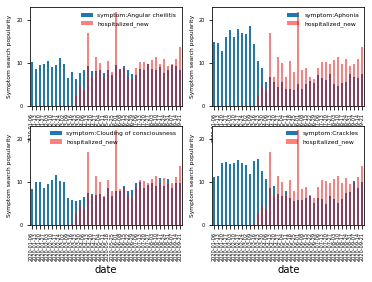

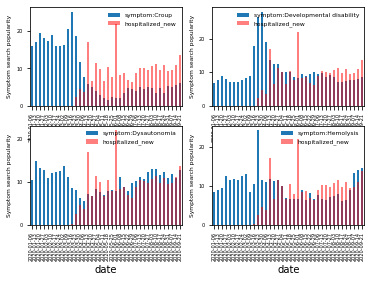

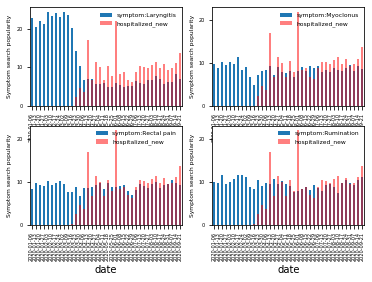

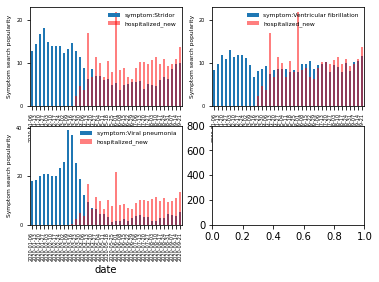

In [3]:
dataset = Data()
dataset.filter_out_zeros()
dataset.normalize_regions()
dataset.keep_x_symptoms(15)
dataset.merge_regions()
symp_pop = SymptomPopularity(dataset.d)
symp_pop.symptoms_popularity()

